# 1. Business Understanding

Hosts can set a price for accommodations. However, hosts often do not know the value for the accommodation they provide themselves. It would be helpful if Airbnb Inc. could calculate and suggest a price for accommodations that is in line with the market. The possibility of automated price calculation is examined in more detail in this case study. It is analyzed whether the provision of intelligent pricing on the part of Airbnb Inc. is possible. In the analysis, the features of an accommodation are analyzed and it is determined which features have an influence on the price of an accommodation. In this way, it should be possible to make as good a price prediction as possible for accommodations that are posted in the future.

# 2. Data and Data Understanding

The Data Understanding section is divided into an all-encompassing review of the data set, followed by an exploratory data analysis that focuses on relevant features. The features are evaluated in terms of their viability and feature selection takes place. The Airbnb-Berlin dataset consists of 16 columns and 22552 rows. The 16 columns contain the features. The data types of the features are seven Integers, five Objects (of which four are Strings and one is Date), and four Floats. 

## 2.1 Import the required modules

In [2]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import folium as fm


from folium import plugins # needs to be imported even if editor says this is unused
from scipy.stats import normaltest
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

import keras

sns.set()

## 2.2 Read data

In [3]:
raw_data = pd.read_csv('https://storage.googleapis.com/ml-service-repository-datastorage/Accommondation_rating_data.csv')

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22552 entries, 0 to 22551
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              22552 non-null  int64  
 1   name                            22493 non-null  object 
 2   host_id                         22552 non-null  int64  
 3   host_name                       22526 non-null  object 
 4   neighbourhood_group             22552 non-null  object 
 5   neighbourhood                   22552 non-null  object 
 6   latitude                        22552 non-null  float64
 7   longitude                       22552 non-null  float64
 8   room_type                       22552 non-null  object 
 9   price                           22552 non-null  int64  
 10  minimum_nights                  22552 non-null  int64  
 11  number_of_reviews               22552 non-null  int64  
 12  last_review                     

In [5]:
raw_data.shape

(22552, 16)

In [6]:
raw_data.count()

id                                22552
name                              22493
host_id                           22552
host_name                         22526
neighbourhood_group               22552
neighbourhood                     22552
latitude                          22552
longitude                         22552
room_type                         22552
price                             22552
minimum_nights                    22552
number_of_reviews                 22552
last_review                       18644
reviews_per_month                 18638
calculated_host_listings_count    22552
availability_365                  22552
dtype: int64

In [7]:
raw_data.head()

id                                              name  host_id host_name  \
0  2015  Berlin-Mitte Value! Quiet courtyard/very central     2217       Ian   
1  2695                Prenzlauer Berg close to Mauerpark     2986   Michael   
2  3176                   Fabulous Flat in great Location     3718    Britta   
3  3309                 BerlinSpot Schöneberg near KaDeWe     4108      Jana   
4  7071                  BrightRoom with sunny greenview!    17391    Bright   

      neighbourhood_group             neighbourhood   latitude  longitude  \
0                   Mitte           Brunnenstr. Süd  52.534537  13.402557   
1                  Pankow  Prenzlauer Berg Nordwest  52.548513  13.404553   
2                  Pankow   Prenzlauer Berg Südwest  52.534996  13.417579   
3  Tempelhof - Schöneberg           Schöneberg-Nord  52.498855  13.349065   
4                  Pankow            Helmholtzplatz  52.543157  13.415091   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0  Entire home/apt     60               4                118  2018-10-28   
1     Private room     17               2                  6  2018-10-01   
2  Entire home/apt     90              62                143  2017-03-20   
3     Private room     26               5                 25  2018-08-16   
4     Private room     42               2                197  2018-11-04   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               3.76                               4               141  
1               1.42                               1                 0  
2               1.25                               1               220  
3               0.39                               1               297  
4               1.75                               1                26

In [8]:
raw_data.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

## 2.3 Descriptive Analytics

In [9]:
raw_data.describe(include='all')

id            name       host_id host_name  \
count   2.255200e+04           22493  2.255200e+04     22526   
unique           NaN           21873           NaN      5997   
top              NaN  Berlin Wohnung           NaN      Anna   
freq             NaN              14           NaN       216   
mean    1.571560e+07             NaN  5.403355e+07       NaN   
std     8.552069e+06             NaN  5.816290e+07       NaN   
min     2.015000e+03             NaN  2.217000e+03       NaN   
25%     8.065954e+06             NaN  9.240002e+06       NaN   
50%     1.686638e+07             NaN  3.126711e+07       NaN   
75%     2.258393e+07             NaN  8.067518e+07       NaN   
max     2.986735e+07             NaN  2.245081e+08       NaN   

             neighbourhood_group         neighbourhood      latitude  \
count                      22552                 22552  22552.000000   
unique                        12                   136           NaN   
top     Friedrichshain-Kreuzberg  Tempelhofer Vorstadt           NaN   
freq                        5497                  1325           NaN   
mean                         NaN                   NaN     52.509824   
std                          NaN                   NaN      0.030825   
min                          NaN                   NaN     52.345803   
25%                          NaN                   NaN     52.489065   
50%                          NaN                   NaN     52.509079   
75%                          NaN                   NaN     52.532669   
max                          NaN                   NaN     52.651670   

           longitude     room_type         price  minimum_nights  \
count   22552.000000         22552  22552.000000    22552.000000   
unique           NaN             3           NaN             NaN   
top              NaN  Private room           NaN             NaN   
freq             NaN         11534           NaN             NaN   
mean       13.406107           NaN     67.143668        7.157059   
std         0.057964           NaN    220.266210       40.665073   
min        13.103557           NaN      0.000000        1.000000   
25%        13.375411           NaN     30.000000        2.000000   
50%        13.416779           NaN     45.000000        2.000000   
75%        13.439259           NaN     70.000000        4.000000   
max        13.757642           NaN   9000.000000     5000.000000   

        number_of_reviews last_review  reviews_per_month  \
count        22552.000000       18644       18638.000000   
unique                NaN        1312                NaN   
top                   NaN  2018-11-04                NaN   
freq                  NaN         618                NaN   
mean            17.840679         NaN           1.135525   
std             36.769624         NaN           1.507082   
min              0.000000         NaN           0.010000   
25%              1.000000         NaN           0.180000   
50%              5.000000         NaN           0.540000   
75%             16.000000         NaN           1.500000   
max            498.000000         NaN          36.670000   

        calculated_host_listings_count  availability_365  
count                     22552.000000      22552.000000  
unique                             NaN               NaN  
top                                NaN               NaN  
freq                               NaN               NaN  
mean                          1.918233         79.852829  
std                           3.667257        119.368162  
min                           1.000000          0.000000  
25%                           1.000000          0.000000  
50%                           1.000000          4.000000  
75%                           1.000000        129.000000  
max                          45.000000        365.000000

### Exploratory data analysis

In this chapter, analyses and visualizations of the available data are made.

In [10]:
features = ["price", "neighbourhood_group","number_of_reviews", "reviews_per_month","last_review","minimum_nights","calculated_host_listings_count","availability_365"]
ax = sns.pairplot(raw_data[features], hue="neighbourhood_group")
ax.fig.suptitle("Comparison of the pairwise relationships (hue = neighbourhood_group)", y=1.04)

Text(0.5, 1.04, 'Comparison of the pairwise relationships (hue = neighbourhood_group)')

In [11]:
features = ["price","number_of_reviews", "reviews_per_month","last_review","minimum_nights","calculated_host_listings_count","availability_365","room_type"]
ay = sns.pairplot(raw_data[features], hue="room_type")
ay.fig.suptitle("Comparison of the pairwise relationships (hue = room_type)", y=1.03)

Text(0.5, 1.03, 'Comparison of the pairwise relationships (hue = room_type)')

### Viewing: Numeric features and date

In [12]:
# At the beginning the date is converted into a numerical value, 
# then the correlation of the numerical features is considered.
# The correlation with the output feature, the price, is in the center of the consideration.

In [13]:
# Create a temporary DataFrame with date as numeric value.
temp_raw_data = raw_data
temp_raw_data.last_review=pd.to_datetime(temp_raw_data.last_review)
temp_raw_data.last_review=pd.to_numeric(temp_raw_data.last_review)

Text(0.5, 1.0, 'Heatmap')

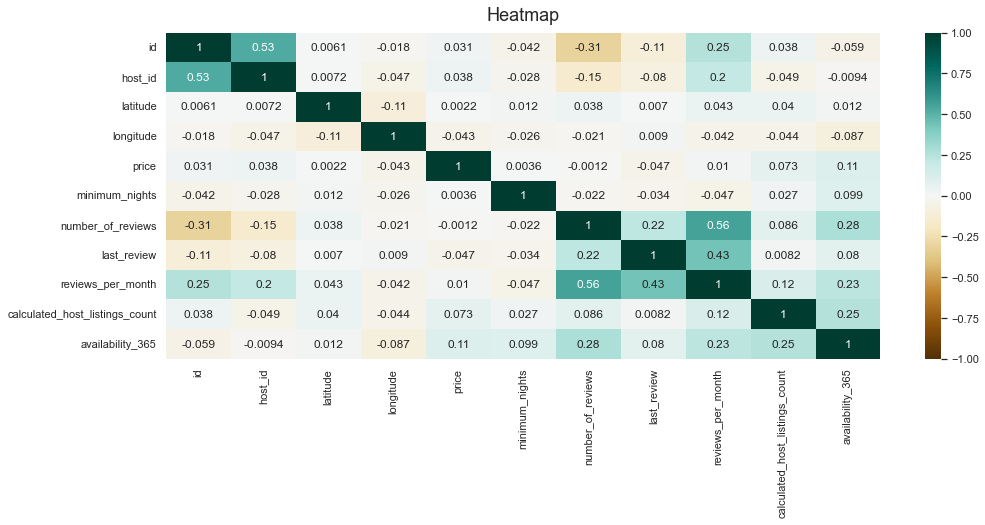

In [14]:
# Korrelation: Heatmap
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(temp_raw_data.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Heatmap', fontdict={'fontsize':18}, pad=12)

In [15]:
#Heatmap with focus on the price
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(temp_raw_data.corr()[['price']].sort_values(by='price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Feature correlation with the price', fontdict={'fontsize':18}, pad=16)

Text(0.5, 1.0, 'Feature correlation with the price')

In [16]:
# Looking at the numerical features, it is noticeable that there is hardly any correlation with price.
# In the next step, the categorical variables are now examined # with regard to their correlation with price. 
# are examined with regard to their correlation with the price.

In [17]:
raw_data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [18]:
temp_test_date = raw_data
temp_test_date.last_review=pd.to_datetime(temp_test_date.last_review)
temp_test_date.last_review=pd.to_numeric(temp_test_date.last_review)

print("Correlation value between last_review and {}:".format(temp_test_date.corr().iloc[4:5,7]))


Correlation value between last_review and price   -0.046731
Name: last_review, dtype: float64:


array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'host_id'}>,
        <AxesSubplot:title={'center':'latitude'}>],
       [<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'minimum_nights'}>],
       [<AxesSubplot:title={'center':'number_of_reviews'}>,
        <AxesSubplot:title={'center':'last_review'}>,
        <AxesSubplot:title={'center':'reviews_per_month'}>],
       [<AxesSubplot:title={'center':'calculated_host_listings_count'}>,
        <AxesSubplot:title={'center':'availability_365'}>,
        <AxesSubplot:>]], dtype=object)

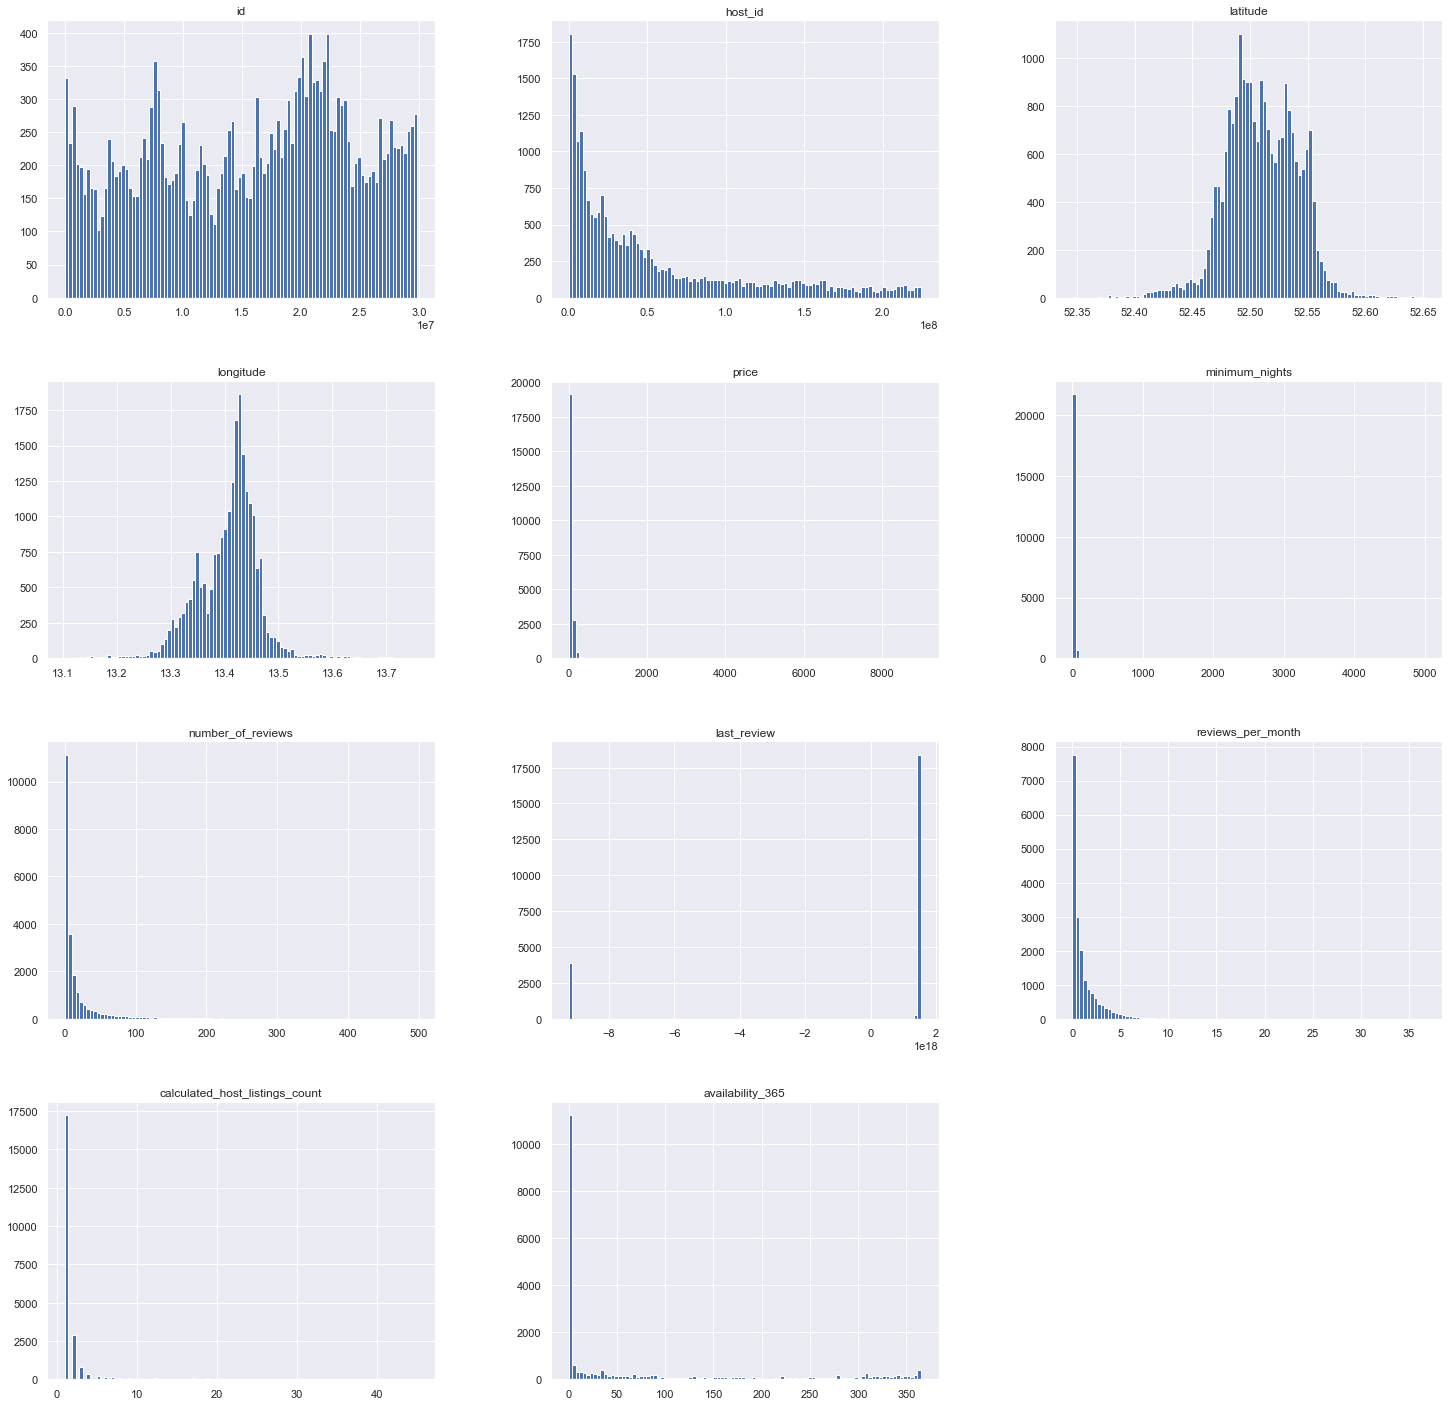

In [19]:
raw_data.hist(figsize=(25,25), bins=100)

### Consideration: Categorical variables

In [20]:
# The consideration of the categorical variables (including longitude and latitude) follows.

#### Viewing: neighbourhood_group and price

In [21]:
raw_data['neighbourhood_group'].describe()

count                        22552
unique                          12
top       Friedrichshain-Kreuzberg
freq                          5497
Name: neighbourhood_group, dtype: object

In [22]:
raw_data['neighbourhood_group'].unique()

array(['Mitte', 'Pankow', 'Tempelhof - Schöneberg',
       'Friedrichshain-Kreuzberg', 'Neukölln', 'Charlottenburg-Wilm.',
       'Treptow - Köpenick', 'Steglitz - Zehlendorf', 'Reinickendorf',
       'Lichtenberg', 'Marzahn - Hellersdorf', 'Spandau'], dtype=object)

In [23]:
raw_data['neighbourhood_group'].value_counts()

Friedrichshain-Kreuzberg    5497
Mitte                       4631
Pankow                      3541
Neukölln                    3499
Charlottenburg-Wilm.        1592
Tempelhof - Schöneberg      1560
Lichtenberg                  688
Treptow - Köpenick           595
Steglitz - Zehlendorf        437
Reinickendorf                247
Marzahn - Hellersdorf        141
Spandau                      124
Name: neighbourhood_group, dtype: int64

In [24]:
raw_data.neighbourhood_group = raw_data.neighbourhood_group.str.replace(" ", "")
raw_data.neighbourhood_group = raw_data.neighbourhood_group.str.replace("Charlottenburg-Wilm.", "Charlottenburg-Wilmersdorf")

C:\Users\du-wa\AppData\Local\Temp/ipykernel_26192/3425726677.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  raw_data.neighbourhood_group = raw_data.neighbourhood_group.str.replace("Charlottenburg-Wilm.", "Charlottenburg-Wilmersdorf")


In [25]:
raw_data['neighbourhood_group'].unique()

array(['Mitte', 'Pankow', 'Tempelhof-Schöneberg',
       'Friedrichshain-Kreuzberg', 'Neukölln',
       'Charlottenburg-Wilmersdorf', 'Treptow-Köpenick',
       'Steglitz-Zehlendorf', 'Reinickendorf', 'Lichtenberg',
       'Marzahn-Hellersdorf', 'Spandau'], dtype=object)

In [26]:
# Consideration of the price median related to the city districts.
# The geojson file used here I uploaded on my github.
# https://github.com/LeaCorinna/AI

In [27]:
berlin_lat = raw_data.latitude.mean()
berlin_long = raw_data.longitude.mean()
colors = ["#3333DD", "#B00000"]

In [28]:
berlin_map = fm.Map(location=[berlin_lat, berlin_long], zoom_start=11)

belin_boroughs = "https://raw.githubusercontent.com/LeaCorinna/AI/main/berlin.geojson"
berlin_price = raw_data.groupby(by="neighbourhood_group").median().reset_index()

fm.Choropleth(
    geo_data=belin_boroughs,
    name='choropleth',
    data=berlin_price,
    columns=['neighbourhood_group', 'price'],
    key_on='feature.properties.name',
    fill_color='RdBu_r',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend = "Median Price (Euro)"
).add_to(berlin_map)

fm.LayerControl().add_to(berlin_map)

berlin_map

In [29]:
# Consideration of the price average related to the city districts.
# The geojson file used here I uploaded on my github.
# https://github.com/LeaCorinna/AI

In [30]:
berlin_map = fm.Map(location=[berlin_lat, berlin_long], zoom_start=11)

belin_boroughs = "https://raw.githubusercontent.com/LeaCorinna/AI/main/berlin.geojson"
berlin_price = raw_data.groupby(by="neighbourhood_group").mean().reset_index()

fm.Choropleth(
    geo_data=belin_boroughs,
    name='choropleth',
    data=berlin_price,
    columns=['neighbourhood_group', 'price'],
    key_on='feature.properties.name',
    fill_color='RdBu_r',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend = "Mean Average Price (Euro)"
).add_to(berlin_map)

fm.LayerControl().add_to(berlin_map)

berlin_map

In [31]:
# Looking at absolute price differences across neighborhoods.

<AxesSubplot:xlabel='neighbourhood_group', ylabel='price'>

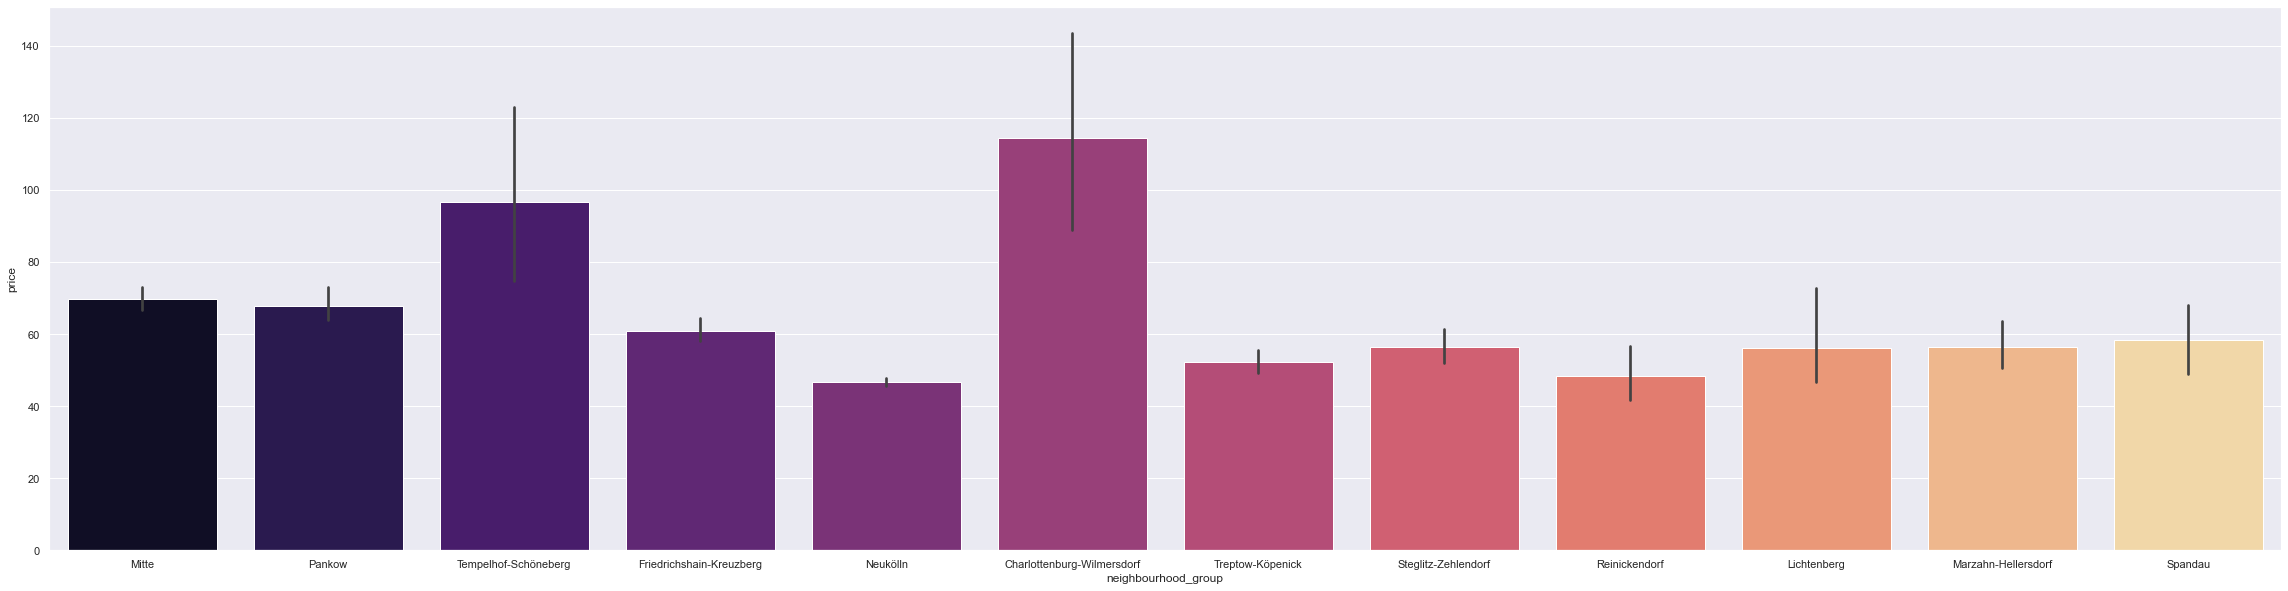

In [32]:
plt.figure(figsize=(40,10))
sns.barplot(x=raw_data['neighbourhood_group'], y=raw_data['price'], palette=sns.color_palette('magma', n_colors=12))

### Viewing: neighbourhood and price

In [33]:
raw_data.neighbourhood.describe()

count                    22552
unique                     136
top       Tempelhofer Vorstadt
freq                      1325
Name: neighbourhood, dtype: object

In [34]:
# Determine the average area per neighborhood
raw_data.groupby('neighbourhood').price.mean()

neighbourhood
Adlershof                48.481481
Albrechtstr.             45.205882
Alexanderplatz           93.199817
Allende-Viertel          41.666667
Alt  Treptow             53.852071
                           ...    
Wilhelmstadt             44.454545
Zehlendorf  Nord         72.363636
Zehlendorf  Südwest      88.450000
nördliche Luisenstadt    61.613636
südliche Luisenstadt     59.598756
Name: price, Length: 136, dtype: float64

<AxesSubplot:xlabel='price', ylabel='neighbourhood'>

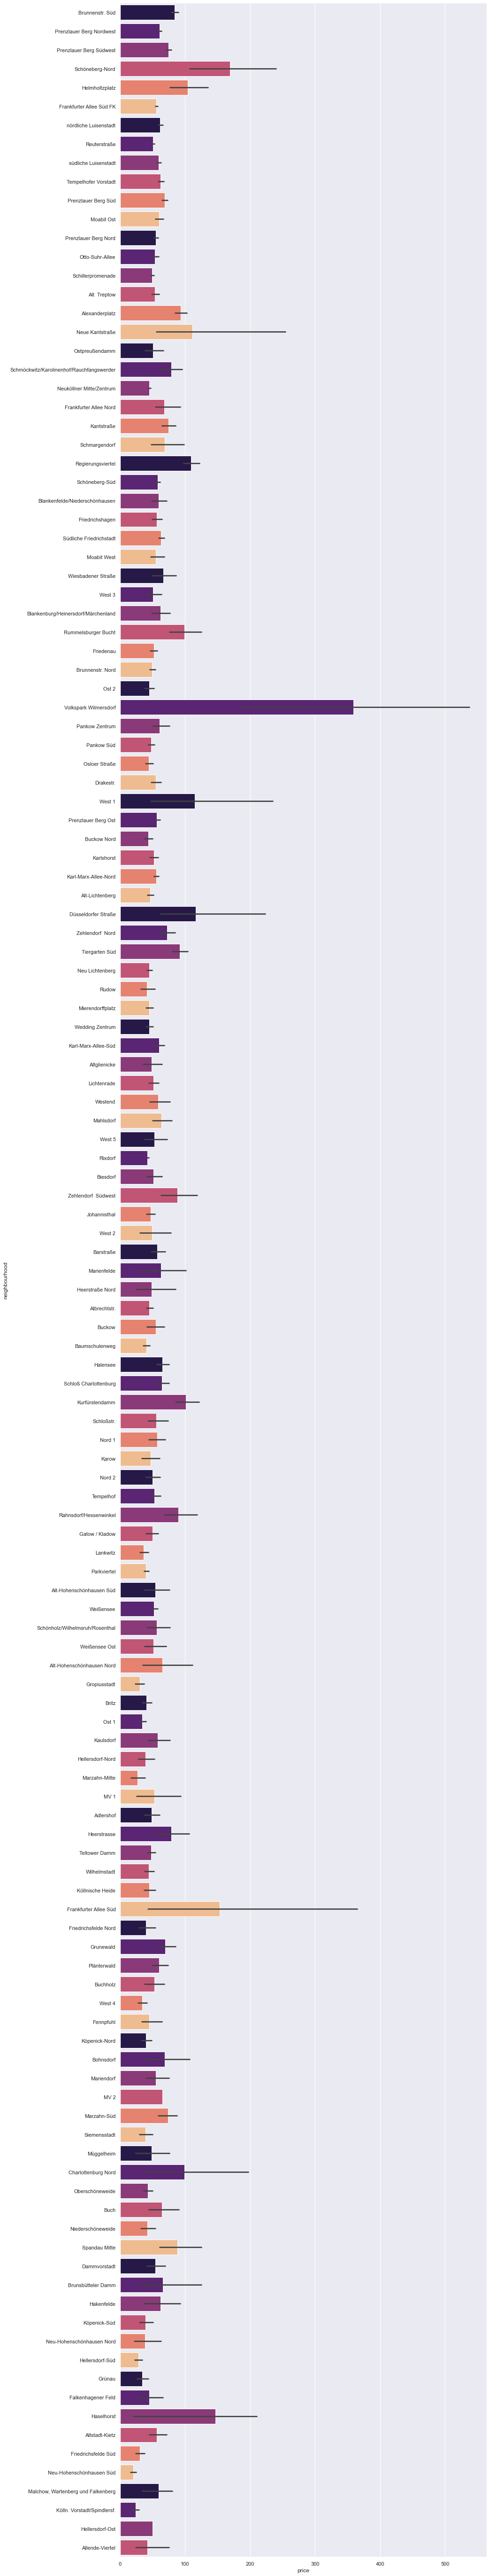

In [35]:
plt.figure(figsize=(14,100))
sns.barplot(x=raw_data['price'], y=raw_data['neighbourhood'], palette=sns.color_palette('magma', n_colors=6))

### Viewing: room_type and neughborhood_group

In [36]:
colors = ["purple", "green", "lightblue"]
raw_data.groupby(by="room_type").count().id.plot(kind="bar", color=colors)

<AxesSubplot:xlabel='room_type'>

In [37]:
raw_data.groupby('room_type')
raw_data.groupby('room_type').price.mean()

room_type
Entire home/apt    83.348909
Private room       52.479105
Shared room        51.564189
Name: price, dtype: float64

c:\Git_Repos\ml-services\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


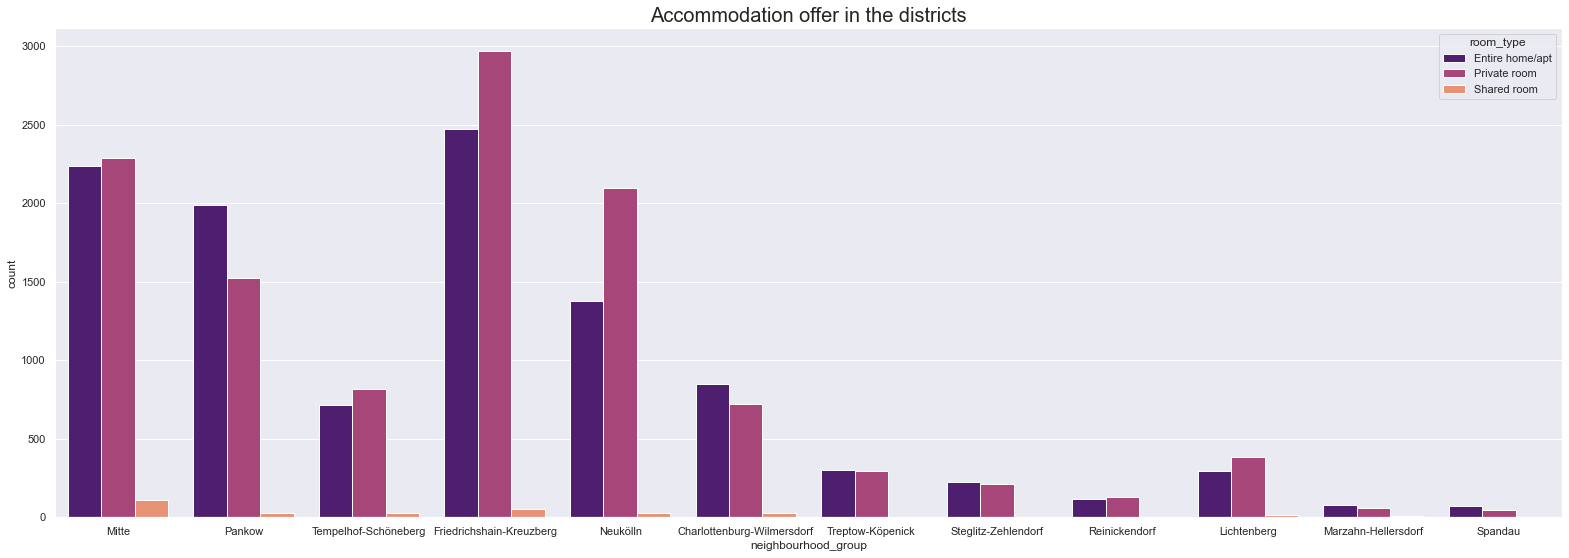

In [38]:
plt.figure(figsize=(27,9))
plt.title("Accommodation offer in the districts",fontsize=20)
sns.countplot(raw_data.neighbourhood_group,hue=raw_data["room_type"], palette=sns.color_palette('magma', n_colors=3))
plt.show()

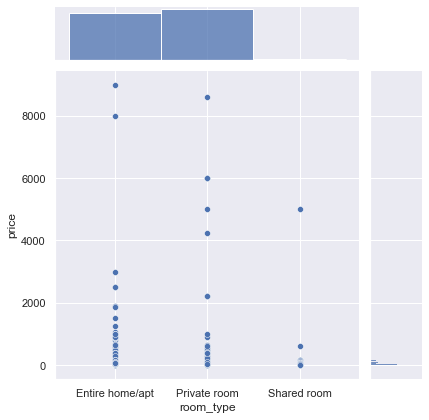

In [39]:
sns.jointplot(x="room_type", y="price", data=raw_data)
plt.show()

In [40]:
# Heatmap: Entire home/apt
heatmap = fm.Map(location=[berlin_lat, berlin_long], zoom_start=11)
heatmap.add_children(fm.plugins.HeatMap(raw_data[raw_data.room_type == "Entire home/apt"][['latitude', 'longitude']].values, radius=15))
heatmap

C:\Users\du-wa\AppData\Local\Temp/ipykernel_26192/606403850.py:3: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
  heatmap.add_children(fm.plugins.HeatMap(raw_data[raw_data.room_type == "Entire home/apt"][['latitude', 'longitude']].values, radius=15))


In [41]:
# Heatmap: Private Room
heatmap = fm.Map(location=[berlin_lat, berlin_long], zoom_start=11)
heatmap.add_children(fm.plugins.HeatMap(raw_data[raw_data.room_type == "Private room"][['latitude', 'longitude']].values, radius=15))
heatmap

C:\Users\du-wa\AppData\Local\Temp/ipykernel_26192/3755830379.py:3: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
  heatmap.add_children(fm.plugins.HeatMap(raw_data[raw_data.room_type == "Private room"][['latitude', 'longitude']].values, radius=15))


In [42]:
# Heatmap: Shared Room
heatmap = fm.Map(location=[berlin_lat, berlin_long], zoom_start=11)
heatmap.add_children(fm.plugins.HeatMap(raw_data[raw_data.room_type == "Shared room"][['latitude', 'longitude']].values, radius=15))
heatmap

C:\Users\du-wa\AppData\Local\Temp/ipykernel_26192/2793628682.py:3: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
  heatmap.add_children(fm.plugins.HeatMap(raw_data[raw_data.room_type == "Shared room"][['latitude', 'longitude']].values, radius=15))


## 2.4 Data Cleaning

The first read errors should be corrected here, before the actual data preparation.

### Missing Values

In [43]:
raw_data.isnull().sum()

id                                   0
name                                59
host_id                              0
host_name                           26
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                          0
reviews_per_month                 3914
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [44]:
# It turned out that the features which contain zero values are relevant for the modeling.
# Therefore, not the corresponding rows but the corresponding columns were removed here.
data_no_mv = raw_data.drop(['host_name','name','last_review','reviews_per_month'], axis=1)
data_no_mv.isnull().sum()

id                                0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [45]:
# format of the DataFrame
data_no_mv.shape

(22552, 12)

In [46]:
data_no_mv.describe(include ='all')

id       host_id       neighbourhood_group  \
count   2.255200e+04  2.255200e+04                     22552   
unique           NaN           NaN                        12   
top              NaN           NaN  Friedrichshain-Kreuzberg   
freq             NaN           NaN                      5497   
mean    1.571560e+07  5.403355e+07                       NaN   
std     8.552069e+06  5.816290e+07                       NaN   
min     2.015000e+03  2.217000e+03                       NaN   
25%     8.065954e+06  9.240002e+06                       NaN   
50%     1.686638e+07  3.126711e+07                       NaN   
75%     2.258393e+07  8.067518e+07                       NaN   
max     2.986735e+07  2.245081e+08                       NaN   

               neighbourhood      latitude     longitude     room_type  \
count                  22552  22552.000000  22552.000000         22552   
unique                   136           NaN           NaN             3   
top     Tempelhofer Vorstadt           NaN           NaN  Private room   
freq                    1325           NaN           NaN         11534   
mean                     NaN     52.509824     13.406107           NaN   
std                      NaN      0.030825      0.057964           NaN   
min                      NaN     52.345803     13.103557           NaN   
25%                      NaN     52.489065     13.375411           NaN   
50%                      NaN     52.509079     13.416779           NaN   
75%                      NaN     52.532669     13.439259           NaN   
max                      NaN     52.651670     13.757642           NaN   

               price  minimum_nights  number_of_reviews  \
count   22552.000000    22552.000000       22552.000000   
unique           NaN             NaN                NaN   
top              NaN             NaN                NaN   
freq             NaN             NaN                NaN   
mean       67.143668        7.157059          17.840679   
std       220.266210       40.665073          36.769624   
min         0.000000        1.000000           0.000000   
25%        30.000000        2.000000           1.000000   
50%        45.000000        2.000000           5.000000   
75%        70.000000        4.000000          16.000000   
max      9000.000000     5000.000000         498.000000   

        calculated_host_listings_count  availability_365  
count                     22552.000000      22552.000000  
unique                             NaN               NaN  
top                                NaN               NaN  
freq                               NaN               NaN  
mean                          1.918233         79.852829  
std                           3.667257        119.368162  
min                           1.000000          0.000000  
25%                           1.000000          0.000000  
50%                           1.000000          4.000000  
75%                           1.000000        129.000000  
max                          45.000000        365.000000

### check duplicates

In [47]:
## the dataset has no duplicates.
data_no_mv[data_no_mv.duplicated()].sum()

id                                0.0
host_id                           0.0
neighbourhood_group               0.0
neighbourhood                     0.0
latitude                          0.0
longitude                         0.0
room_type                         0.0
price                             0.0
minimum_nights                    0.0
number_of_reviews                 0.0
calculated_host_listings_count    0.0
availability_365                  0.0
dtype: float64

### Wrong values

In [48]:
## A minimum overnight stay of more than 13 years is to be considered erroneous.
## The corresponding lines will be deleted.

In [49]:
data_no_mv.drop(data_no_mv.loc[data_no_mv['minimum_nights']>=5000].index, inplace=True)
data_no_mv.describe()

id       host_id      latitude     longitude         price  \
count  2.255100e+04  2.255100e+04  22551.000000  22551.000000  22551.000000   
mean   1.571595e+07  5.403410e+07     52.509823     13.406110     67.135338   
std    8.552100e+06  5.816413e+07      0.030826      0.057963    220.267542   
min    2.015000e+03  2.217000e+03     52.345803     13.103557      0.000000   
25%    8.066394e+06  9.239060e+06     52.489065     13.375413     30.000000   
50%    1.686665e+07  3.126622e+07     52.509078     13.416780     45.000000   
75%    2.258403e+07  8.067518e+07     52.532669     13.439259     70.000000   
max    2.986735e+07  2.245081e+08     52.651670     13.757642   9000.000000   

       minimum_nights  number_of_reviews  calculated_host_listings_count  \
count    22551.000000       22551.000000                    22551.000000   
mean         6.935657          17.841293                        1.918230   
std         23.413599          36.770324                        3.667338   
min          1.000000           0.000000                        1.000000   
25%          2.000000           1.000000                        1.000000   
50%          2.000000           5.000000                        1.000000   
75%          4.000000          16.000000                        1.000000   
max       1000.000000         498.000000                       45.000000   

       availability_365  
count      22551.000000  
mean          79.840495  
std          119.356437  
min            0.000000  
25%            0.000000  
50%            4.000000  
75%          129.000000  
max          365.000000

In [50]:
## An overnight rate of 0 Euro or 1 Euro is to be considered as incorrect.
## The corresponding lines will be deleted.

In [51]:
data_no_mv = data_no_mv[data_no_mv.price > 1]
data_no_mv.describe(include ='all')

id       host_id       neighbourhood_group  \
count   2.254200e+04  2.254200e+04                     22542   
unique           NaN           NaN                        12   
top              NaN           NaN  Friedrichshain-Kreuzberg   
freq             NaN           NaN                      5493   
mean    1.571401e+07  5.403000e+07                       NaN   
std     8.553230e+06  5.816590e+07                       NaN   
min     2.015000e+03  2.217000e+03                       NaN   
25%     8.065068e+06  9.236164e+06                       NaN   
50%     1.686508e+07  3.126015e+07                       NaN   
75%     2.258574e+07  8.064741e+07                       NaN   
max     2.986735e+07  2.245081e+08                       NaN   

               neighbourhood      latitude     longitude     room_type  \
count                  22542  22542.000000  22542.000000         22542   
unique                   136           NaN           NaN             3   
top     Tempelhofer Vorstadt           NaN           NaN  Private room   
freq                    1324           NaN           NaN         11528   
mean                     NaN     52.509825     13.406102           NaN   
std                      NaN      0.030825      0.057964           NaN   
min                      NaN     52.345803     13.103557           NaN   
25%                      NaN     52.489064     13.375412           NaN   
50%                      NaN     52.509071     13.416779           NaN   
75%                      NaN     52.532670     13.439256           NaN   
max                      NaN     52.651670     13.757642           NaN   

               price  minimum_nights  number_of_reviews  \
count   22542.000000    22542.000000       22542.000000   
unique           NaN             NaN                NaN   
top              NaN             NaN                NaN   
freq             NaN             NaN                NaN   
mean       67.162097        6.937583          17.839899   
std       220.307438       23.418064          36.772123   
min         8.000000        1.000000           0.000000   
25%        30.000000        2.000000           1.000000   
50%        45.000000        2.000000           5.000000   
75%        70.000000        4.000000          16.000000   
max      9000.000000     1000.000000         498.000000   

        calculated_host_listings_count  availability_365  
count                     22542.000000      22542.000000  
unique                             NaN               NaN  
top                                NaN               NaN  
freq                               NaN               NaN  
mean                          1.917443         79.840786  
std                           3.666631        119.356156  
min                           1.000000          0.000000  
25%                           1.000000          0.000000  
50%                           1.000000          4.000000  
75%                           1.000000        129.000000  
max                          45.000000        365.000000

### Implementation: Iterative feature selection

In [52]:
data_no_mv.head()

id  host_id   neighbourhood_group             neighbourhood   latitude  \
0  2015     2217                 Mitte           Brunnenstr. Süd  52.534537   
1  2695     2986                Pankow  Prenzlauer Berg Nordwest  52.548513   
2  3176     3718                Pankow   Prenzlauer Berg Südwest  52.534996   
3  3309     4108  Tempelhof-Schöneberg           Schöneberg-Nord  52.498855   
4  7071    17391                Pankow            Helmholtzplatz  52.543157   

   longitude        room_type  price  minimum_nights  number_of_reviews  \
0  13.402557  Entire home/apt     60               4                118   
1  13.404553     Private room     17               2                  6   
2  13.417579  Entire home/apt     90              62                143   
3  13.349065     Private room     26               5                 25   
4  13.415091     Private room     42               2                197   

   calculated_host_listings_count  availability_365  
0                               4               141  
1                               1                 0  
2                               1               220  
3                               1               297  
4                               1                26

In [53]:
# Important!!! Intermediate result. 
# This dataset data_feature_selection will be used later for the Randomn Forest classification.
data_feature_auswahl = data_no_mv.drop(['id','host_id','latitude', 'longitude','number_of_reviews','neighbourhood','minimum_nights'],axis=1)

In [54]:
data_feature_auswahl.head()

neighbourhood_group        room_type  price  \
0                 Mitte  Entire home/apt     60   
1                Pankow     Private room     17   
2                Pankow  Entire home/apt     90   
3  Tempelhof-Schöneberg     Private room     26   
4                Pankow     Private room     42   

   calculated_host_listings_count  availability_365  
0                               4               141  
1                               1                 0  
2                               1               220  
3                               1               297  
4                               1                26

### Outlier 

In [55]:
# Unproblematic to cut off at the 99% quantile, stretchable to the 95% quantiel. 
# Procedure: Calculate quantile boundary, clean data set.

#### price

In [56]:
# It is particularly important that the target variable is normally distributed,
# which is why a best possible adjustment of the target variable is carried out.

c:\Git_Repos\ml-services\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Preisverteilung')

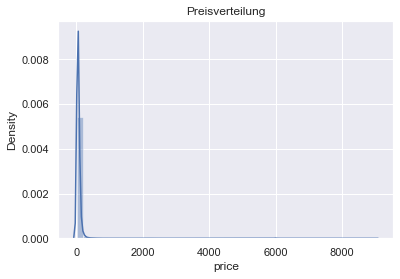

In [57]:
sns.distplot(data_feature_auswahl['price'])
plt.title("Preisverteilung")

c:\Git_Repos\ml-services\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Preisverteilung (99%)')

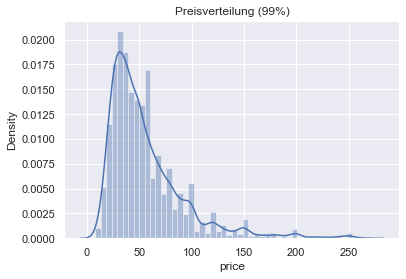

In [58]:
# At the beginning: truncation at the 99% quantile.
q = data_feature_auswahl['price'].quantile(0.99)
data_1 = data_feature_auswahl[data_feature_auswahl['price']<q]
sns.distplot(data_1['price'])
plt.title("Preisverteilung (99%)")

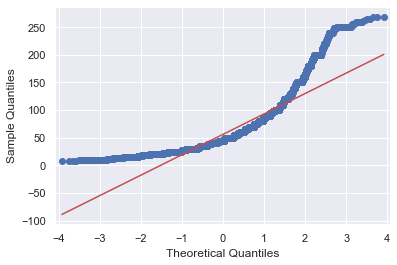

In [59]:
qqplot(data_1['price'], line='s')
plt.show()

c:\Git_Repos\ml-services\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Preisverteilung (95%)')

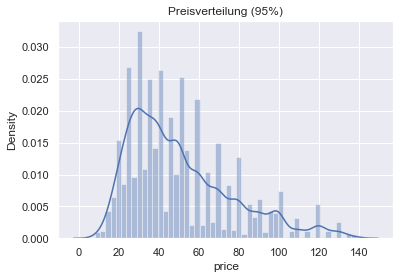

In [60]:
## Truncation at the 99% quantile does not yet correspond to the normal distribution
## Truncation at the 95% quantile to approach the normal distribution
q = data_feature_auswahl['price'].quantile(0.95)
data_2 = data_feature_auswahl[data_feature_auswahl['price']<q]
sns.distplot(data_2['price'])
plt.title("Preisverteilung (95%)")

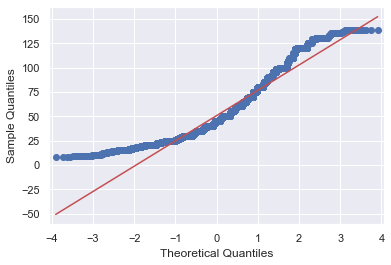

In [61]:
qqplot(data_2['price'], line='s')
plt.show()

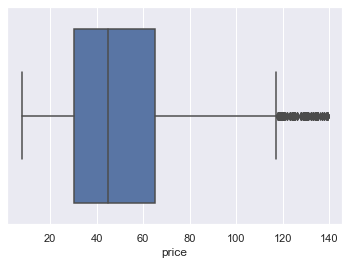

In [62]:
ax = sns.boxplot(x=data_2["price"])

####  calculated_host_listings_count

c:\Git_Repos\ml-services\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Verteilung der host listings')

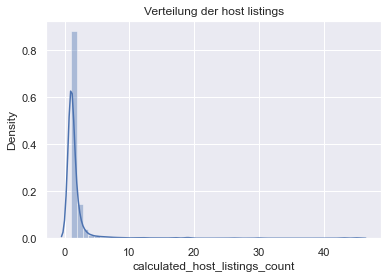

In [63]:
sns.distplot(data_2['calculated_host_listings_count'])
plt.title("Verteilung der host listings")

c:\Git_Repos\ml-services\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Preisverteilung')

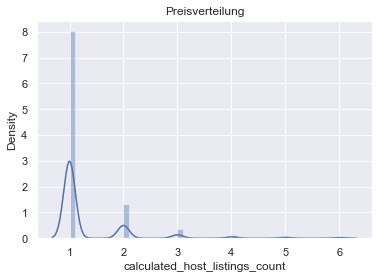

In [64]:
# Unproblematic truncation at 99% quantile, extensible up to 95% quantile 
# Truncation at the 99% quantile does not yet correspond to the normal distribution
q = data_2['calculated_host_listings_count'].quantile(0.97)
data_3 = data_2[data_2['calculated_host_listings_count']<q]
sns.distplot(data_3['calculated_host_listings_count'])
plt.title("Preisverteilung")

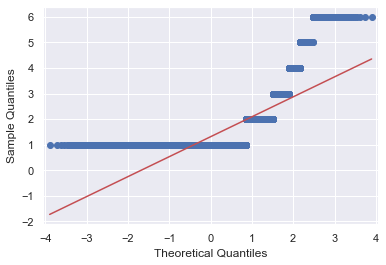

In [65]:
qqplot(data_3['calculated_host_listings_count'], line='s')
plt.show()

#### availability_365

c:\Git_Repos\ml-services\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Verteilung: Unterkunftverfügbarkeit')

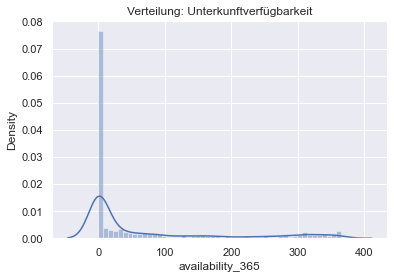

In [66]:
sns.distplot(data_3['availability_365'])
plt.title("Verteilung: Unterkunftverfügbarkeit")

c:\Git_Repos\ml-services\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Preisverteilung')

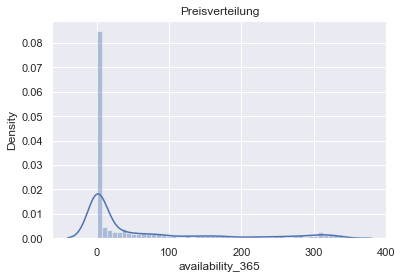

In [67]:
# Cut off 99% quantile unproblematically, can be stretched to 95% quantile. 
# Truncate at 99% quantile does not yet conform to normal distribution.
q = data_3['availability_365'].quantile(0.96)
data_4 = data_3[data_3['availability_365']<q]
sns.distplot(data_4['availability_365'])
plt.title("Preisverteilung")

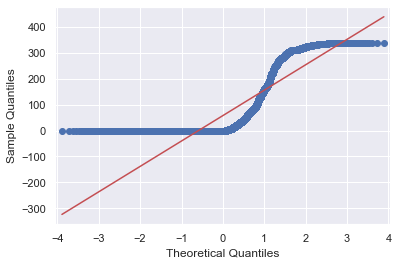

In [68]:
qqplot(data_4['availability_365'], line='s')
plt.show()

In [69]:
data_4.describe(include='all')

neighbourhood_group     room_type         price  \
count                      19820         19820  19820.000000   
unique                        12             3           NaN   
top     Friedrichshain-Kreuzberg  Private room           NaN   
freq                        4964         10686           NaN   
mean                         NaN           NaN     49.799950   
std                          NaN           NaN     25.553927   
min                          NaN           NaN      8.000000   
25%                          NaN           NaN     30.000000   
50%                          NaN           NaN     45.000000   
75%                          NaN           NaN     65.000000   
max                          NaN           NaN    139.000000   

        calculated_host_listings_count  availability_365  
count                      19820.00000      19820.000000  
unique                             NaN               NaN  
top                                NaN               NaN  
freq                               NaN               NaN  
mean                           1.29773         58.003380  
std                            0.75429         98.235961  
min                            1.00000          0.000000  
25%                            1.00000          0.000000  
50%                            1.00000          0.000000  
75%                            1.00000         72.000000  
max                            6.00000        340.000000

#  3. Data Preparation

## 3.1 Reset the index

In [70]:
berlin_airbnb = data_4.reset_index(drop=True)
berlin_airbnb.describe(include = 'all')

neighbourhood_group     room_type         price  \
count                      19820         19820  19820.000000   
unique                        12             3           NaN   
top     Friedrichshain-Kreuzberg  Private room           NaN   
freq                        4964         10686           NaN   
mean                         NaN           NaN     49.799950   
std                          NaN           NaN     25.553927   
min                          NaN           NaN      8.000000   
25%                          NaN           NaN     30.000000   
50%                          NaN           NaN     45.000000   
75%                          NaN           NaN     65.000000   
max                          NaN           NaN    139.000000   

        calculated_host_listings_count  availability_365  
count                      19820.00000      19820.000000  
unique                             NaN               NaN  
top                                NaN               NaN  
freq                               NaN               NaN  
mean                           1.29773         58.003380  
std                            0.75429         98.235961  
min                            1.00000          0.000000  
25%                            1.00000          0.000000  
50%                            1.00000          0.000000  
75%                            1.00000         72.000000  
max                            6.00000        340.000000

In [71]:
berlin_airbnb.shape

(19820, 5)

In [72]:
berlin_airbnb

neighbourhood_group        room_type  price  \
0                     Mitte  Entire home/apt     60   
1                    Pankow     Private room     17   
2                    Pankow  Entire home/apt     90   
3      Tempelhof-Schöneberg     Private room     26   
4                    Pankow     Private room     42   
...                     ...              ...    ...   
19815                 Mitte  Entire home/apt     60   
19816  Tempelhof-Schöneberg      Shared room     20   
19817                Pankow  Entire home/apt     85   
19818                 Mitte     Private room     99   
19819              Neukölln     Private room     45   

       calculated_host_listings_count  availability_365  
0                                   4               141  
1                                   1                 0  
2                                   1               220  
3                                   1               297  
4                                   1                26  
...                               ...               ...  
19815                               1               314  
19816                               6                78  
19817                               2                15  
19818                               3                 6  
19819                               1                21  

[19820 rows x 5 columns]

## 3.2 Checking OLS Assumptions

### 3.2.1 Assumption linearity

In [73]:
# Check linearity of price and calculated_host_listings_count

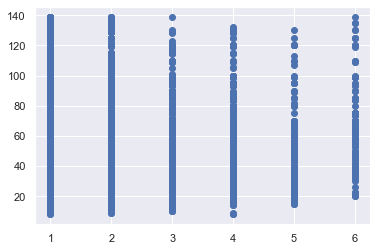

In [74]:
plt.scatter(berlin_airbnb['calculated_host_listings_count'],berlin_airbnb['price'])

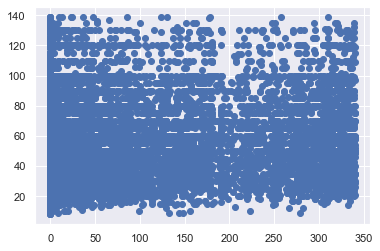

In [75]:
plt.scatter(berlin_airbnb['availability_365'],berlin_airbnb['price'])

In [76]:
# There is a violation of the OLS assumption of linearity.
# A possible solution for this is a log transformation.
# A Log Transformation is generally recommended if the data is exponentially distributed.
# Also an exponential distribution is not to be determined here. 
# However, in the iterative test it is to be determined that the Accuracy of the Multiple Linear Regression 
# turns out better, if one operates on the logorithmized data.
# ==> Log transformation of the price is made. 

In [77]:
log_price = np.log(berlin_airbnb['price'])
berlin_airbnb['log_price'] = log_price
berlin_airbnb

neighbourhood_group        room_type  price  \
0                     Mitte  Entire home/apt     60   
1                    Pankow     Private room     17   
2                    Pankow  Entire home/apt     90   
3      Tempelhof-Schöneberg     Private room     26   
4                    Pankow     Private room     42   
...                     ...              ...    ...   
19815                 Mitte  Entire home/apt     60   
19816  Tempelhof-Schöneberg      Shared room     20   
19817                Pankow  Entire home/apt     85   
19818                 Mitte     Private room     99   
19819              Neukölln     Private room     45   

       calculated_host_listings_count  availability_365  log_price  
0                                   4               141   4.094345  
1                                   1                 0   2.833213  
2                                   1               220   4.499810  
3                                   1               297   3.258097  
4                                   1                26   3.737670  
...                               ...               ...        ...  
19815                               1               314   4.094345  
19816                               6                78   2.995732  
19817                               2                15   4.442651  
19818                               3                 6   4.595120  
19819                               1                21   3.806662  

[19820 rows x 6 columns]

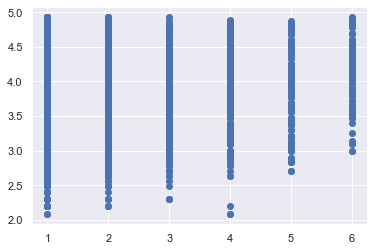

In [78]:
plt.scatter(berlin_airbnb['calculated_host_listings_count'],berlin_airbnb['log_price'])

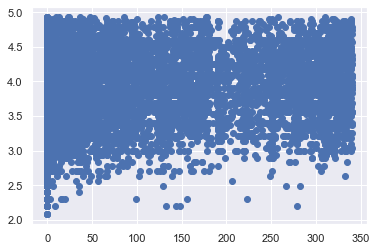

In [79]:
plt.scatter(berlin_airbnb['availability_365'],berlin_airbnb['log_price'])

In [80]:
berlin_airbnb = berlin_airbnb.drop(['price'], axis=1)

### 3.2.2 Assumption "No multicollinearity"

In [81]:
berlin_airbnb.columns.values

array(['neighbourhood_group', 'room_type',
       'calculated_host_listings_count', 'availability_365', 'log_price'],
      dtype=object)

In [82]:
# All VIF values are < 10 -> no multicolinearity
variables = berlin_airbnb[['calculated_host_listings_count','availability_365','log_price']]
vif = pd.DataFrame()
vif['VIF']= [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns
vif

VIF                        Features
0  4.021130  calculated_host_listings_count
1  1.440053                availability_365
2  3.923877                       log_price

#### Bereinigung Einzelwerte neighbourhood_group

In [83]:
# There are no individual values available.
berlin_airbnb.groupby('neighbourhood_group').count()

room_type  calculated_host_listings_count  \
neighbourhood_group                                                     
Charlottenburg-Wilmersdorf       1302                            1302   
Friedrichshain-Kreuzberg         4964                            4964   
Lichtenberg                       625                             625   
Marzahn-Hellersdorf               110                             110   
Mitte                            3848                            3848   
Neukölln                         3313                            3313   
Pankow                           3110                            3110   
Reinickendorf                     206                             206   
Spandau                            78                              78   
Steglitz-Zehlendorf               368                             368   
Tempelhof-Schöneberg             1357                            1357   
Treptow-Köpenick                  539                             539   

                            availability_365  log_price  
neighbourhood_group                                      
Charlottenburg-Wilmersdorf              1302       1302  
Friedrichshain-Kreuzberg                4964       4964  
Lichtenberg                              625        625  
Marzahn-Hellersdorf                      110        110  
Mitte                                   3848       3848  
Neukölln                                3313       3313  
Pankow                                  3110       3110  
Reinickendorf                            206        206  
Spandau                                   78         78  
Steglitz-Zehlendorf                      368        368  
Tempelhof-Schöneberg                    1357       1357  
Treptow-Köpenick                         539        539

## 3.3 create dummy variables

In [84]:
berlin_airbnb.head()

neighbourhood_group        room_type  calculated_host_listings_count  \
0                 Mitte  Entire home/apt                               4   
1                Pankow     Private room                               1   
2                Pankow  Entire home/apt                               1   
3  Tempelhof-Schöneberg     Private room                               1   
4                Pankow     Private room                               1   

   availability_365  log_price  
0               141   4.094345  
1                 0   2.833213  
2               220   4.499810  
3               297   3.258097  
4                26   3.737670

In [85]:
#berlin_airbnb_with_dummies = berlin_airbnb.drop(['availability_365','minimum_nights'], axis=1)

In [86]:
berlin_airbnb_with_dummies=pd.get_dummies(berlin_airbnb, drop_first=True)

In [87]:
berlin_airbnb_with_dummies.head()

calculated_host_listings_count  availability_365  log_price  \
0                               4               141   4.094345   
1                               1                 0   2.833213   
2                               1               220   4.499810   
3                               1               297   3.258097   
4                               1                26   3.737670   

   neighbourhood_group_Friedrichshain-Kreuzberg  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   neighbourhood_group_Lichtenberg  neighbourhood_group_Marzahn-Hellersdorf  \
0                                0                                        0   
1                                0                                        0   
2                                0                                        0   
3                                0                                        0   
4                                0                                        0   

   neighbourhood_group_Mitte  neighbourhood_group_Neukölln  \
0                          1                             0   
1                          0                             0   
2                          0                             0   
3                          0                             0   
4                          0                             0   

   neighbourhood_group_Pankow  neighbourhood_group_Reinickendorf  \
0                           0                                  0   
1                           1                                  0   
2                           1                                  0   
3                           0                                  0   
4                           1                                  0   

   neighbourhood_group_Spandau  neighbourhood_group_Steglitz-Zehlendorf  \
0                            0                                        0   
1                            0                                        0   
2                            0                                        0   
3                            0                                        0   
4                            0                                        0   

   neighbourhood_group_Tempelhof-Schöneberg  \
0                                         0   
1                                         0   
2                                         0   
3                                         1   
4                                         0   

   neighbourhood_group_Treptow-Köpenick  room_type_Private room  \
0                                     0                       0   
1                                     0                       1   
2                                     0                       0   
3                                     0                       1   
4                                     0                       1   

   room_type_Shared room  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0

In [88]:
berlin_airbnb_with_dummies.shape

(19820, 16)

In [89]:
berlin_airbnb_with_dummies.columns.values

array(['calculated_host_listings_count', 'availability_365', 'log_price',
       'neighbourhood_group_Friedrichshain-Kreuzberg',
       'neighbourhood_group_Lichtenberg',
       'neighbourhood_group_Marzahn-Hellersdorf',
       'neighbourhood_group_Mitte', 'neighbourhood_group_Neukölln',
       'neighbourhood_group_Pankow', 'neighbourhood_group_Reinickendorf',
       'neighbourhood_group_Spandau',
       'neighbourhood_group_Steglitz-Zehlendorf',
       'neighbourhood_group_Tempelhof-Schöneberg',
       'neighbourhood_group_Treptow-Köpenick', 'room_type_Private room',
       'room_type_Shared room'], dtype=object)

In [90]:
cols = ['log_price', 'calculated_host_listings_count', 'availability_365', 
       'neighbourhood_group_Friedrichshain-Kreuzberg',
       'neighbourhood_group_Lichtenberg',
       'neighbourhood_group_Marzahn-Hellersdorf',
       'neighbourhood_group_Mitte', 'neighbourhood_group_Neukölln',
       'neighbourhood_group_Pankow', 'neighbourhood_group_Reinickendorf',
       'neighbourhood_group_Spandau',
       'neighbourhood_group_Steglitz-Zehlendorf',
       'neighbourhood_group_Tempelhof-Schöneberg',
       'neighbourhood_group_Treptow-Köpenick', 'room_type_Private room',
       'room_type_Shared room']
# Actual vs. Predicted plotted

In [91]:
lin_reg_berlin_airbnb_with_dummies = berlin_airbnb_with_dummies[cols]

In [92]:
lin_reg_berlin_airbnb_with_dummies.head()

log_price  calculated_host_listings_count  availability_365  \
0   4.094345                               4               141   
1   2.833213                               1                 0   
2   4.499810                               1               220   
3   3.258097                               1               297   
4   3.737670                               1                26   

   neighbourhood_group_Friedrichshain-Kreuzberg  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   neighbourhood_group_Lichtenberg  neighbourhood_group_Marzahn-Hellersdorf  \
0                                0                                        0   
1                                0                                        0   
2                                0                                        0   
3                                0                                        0   
4                                0                                        0   

   neighbourhood_group_Mitte  neighbourhood_group_Neukölln  \
0                          1                             0   
1                          0                             0   
2                          0                             0   
3                          0                             0   
4                          0                             0   

   neighbourhood_group_Pankow  neighbourhood_group_Reinickendorf  \
0                           0                                  0   
1                           1                                  0   
2                           1                                  0   
3                           0                                  0   
4                           1                                  0   

   neighbourhood_group_Spandau  neighbourhood_group_Steglitz-Zehlendorf  \
0                            0                                        0   
1                            0                                        0   
2                            0                                        0   
3                            0                                        0   
4                            0                                        0   

   neighbourhood_group_Tempelhof-Schöneberg  \
0                                         0   
1                                         0   
2                                         0   
3                                         1   
4                                         0   

   neighbourhood_group_Treptow-Köpenick  room_type_Private room  \
0                                     0                       0   
1                                     0                       1   
2                                     0                       0   
3                                     0                       1   
4                                     0                       1   

   room_type_Shared room  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0

# 4. Modeling and Evaluation

Residuals provide information on how accurately the dependent variable can be estimated in a regression. They indicate how far the predicted value agrees with the actual value. The smaller the residual the better.

## 4.1 Multiple Linear Regression

In [93]:
targets = lin_reg_berlin_airbnb_with_dummies['log_price']
inputs = lin_reg_berlin_airbnb_with_dummies.drop(['log_price'],axis= 1)

### Feature Skaling

In [94]:
scaler = StandardScaler()
scaler.fit(inputs)
input_scaled = scaler.transform(inputs)

### Train Test Split (= prevents Overfitting) 

In [95]:
x_train, x_test, y_train, y_test = train_test_split(input_scaled, targets,test_size=0.2, random_state=365)

### Production of Regression

In [96]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [97]:
y_hat = reg.predict(x_train)

In [98]:
plt.scatter(y_train,y_hat)
plt.xlabel('Targets')
plt.ylabel('Predictions')
plt.show()

In [99]:
print(" Intercept:\n", reg.intercept_) 

 Intercept:
 3.781225116168546


In [100]:
print("Koeffizienten Weights: \n", reg.coef_)

Koeffizienten Weights: 
 [ 0.00598836  0.06202005  0.04087519 -0.0213382  -0.01248334  0.02006909
 -0.01683975  0.02953642 -0.01720474 -0.00819149 -0.00947675  0.0019844
 -0.0109827  -0.28451957 -0.08382892]


In [101]:
reg_summary = pd.DataFrame(inputs.columns, columns=['Features'])
reg_summary['Weights']= reg.coef_
reg_summary

Features   Weights
0                 calculated_host_listings_count  0.005988
1                               availability_365  0.062020
2   neighbourhood_group_Friedrichshain-Kreuzberg  0.040875
3                neighbourhood_group_Lichtenberg -0.021338
4        neighbourhood_group_Marzahn-Hellersdorf -0.012483
5                      neighbourhood_group_Mitte  0.020069
6                   neighbourhood_group_Neukölln -0.016840
7                     neighbourhood_group_Pankow  0.029536
8              neighbourhood_group_Reinickendorf -0.017205
9                    neighbourhood_group_Spandau -0.008191
10       neighbourhood_group_Steglitz-Zehlendorf -0.009477
11      neighbourhood_group_Tempelhof-Schöneberg  0.001984
12          neighbourhood_group_Treptow-Köpenick -0.010983
13                        room_type_Private room -0.284520
14                         room_type_Shared room -0.083829

#### R^2 Wert

In [102]:
## Coefficient of determination, which reflects the relationship between independent and dependent variable.
## R^2 lies in the range between 0 and 1.
## If the R^2 value is equal to 1, all points lie ideally on the regression line.  

In [103]:
#R^2 value
R_2=reg.score(x_train, y_train)
print('Train Performance')
print('R2:  ',R_2)

Train Performance
R2:   0.37528899462129495


In [104]:
# Residuen (=error terms)
sns.distplot(y_train - y_hat)
plt.title("Residuals")

c:\Git_Repos\ml-services\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuals')

### Testing

In [105]:
y_hat_test = reg.predict(x_test)

In [106]:
plt.scatter(y_test,y_hat_test, alpha=0.2)
plt.xlabel('Targets Test')
plt.ylabel('Predictions Test')
plt.show()

#### R^2 value

In [107]:
## Coefficient of determination, which reflects the relationship between independent and dependent variable.
## R^2 lies in the range between 0 and 1.
## The closer the R^2 value is to 1, the better is the  

In [108]:
R_2=reg.score(x_test, y_test)
print('Test Performance')
print('R2:   ',R_2)

Test Performance
R2:    0.374654184475112


#### Mean Absolute Error

In [109]:
## Average absolute deviation of the predicted value from the value that occurred.
## Undirected accumulation of over- and underestimations.
## MAE = 0 can be interpreted as a perfect forecast.

In [110]:
print("MAE: ", mean_absolute_error(y_test, y_hat_test))

MAE:  0.3113972654675436


#### Mean Squared Error

In [111]:
## The squared ME
## Large deviations receive a disproportionate weight compared to small deviations.
## MSE = 0 can be interpreted as a perfect forecast.

In [112]:
print("MSE: ", mean_squared_error(y_test,  y_hat_test))

MSE:  0.15559724128358376


#### Predictions, Targets, Residuals, Difference% 

In [113]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Predictions'])
df_pf.head()

Predictions
0    35.086682
1    36.611418
2    35.460856
3    35.259933
4    34.746644

In [114]:
#df_pf['Targets']=np.exp(y_test)
#df_pf

In [115]:
y_test = y_test.reset_index(drop=True)
df_pf['Targets']=np.exp(y_test)
df_pf

Predictions  Targets
0       35.086682     58.0
1       36.611418     25.0
2       35.460856     25.0
3       35.259933     36.0
4       34.746644     22.0
...           ...      ...
3959    38.419789     55.0
3960    61.810220     35.0
3961    34.471874     15.0
3962    31.783167     35.0
3963    34.471874     50.0

[3964 rows x 2 columns]

In [116]:
df_pf['Residuals'] = df_pf['Targets'] - df_pf['Predictions']
df_pf

Predictions  Targets  Residuals
0       35.086682     58.0  22.913318
1       36.611418     25.0 -11.611418
2       35.460856     25.0 -10.460856
3       35.259933     36.0   0.740067
4       34.746644     22.0 -12.746644
...           ...      ...        ...
3959    38.419789     55.0  16.580211
3960    61.810220     35.0 -26.810220
3961    34.471874     15.0 -19.471874
3962    31.783167     35.0   3.216833
3963    34.471874     50.0  15.528126

[3964 rows x 3 columns]

In [117]:
df_pf['Difference%'] = np.absolute(df_pf['Residuals'] / df_pf['Targets']*100)
df_pf

Predictions  Targets  Residuals  Difference%
0       35.086682     58.0  22.913318    39.505721
1       36.611418     25.0 -11.611418    46.445670
2       35.460856     25.0 -10.460856    41.843425
3       35.259933     36.0   0.740067     2.055743
4       34.746644     22.0 -12.746644    57.939292
...           ...      ...        ...          ...
3959    38.419789     55.0  16.580211    30.145838
3960    61.810220     35.0 -26.810220    76.600629
3961    34.471874     15.0 -19.471874   129.812490
3962    31.783167     35.0   3.216833     9.190951
3963    34.471874     50.0  15.528126    31.056253

[3964 rows x 4 columns]

In [118]:
df_pf.describe(include ='all')

Predictions      Targets    Residuals  Difference%
count  3964.000000  3964.000000  3964.000000  3964.000000
mean     45.798296    49.726791     3.928495    32.477736
std      14.211519    25.308897    20.494517    30.655094
min      21.093085     9.000000   -52.302901     0.021569
25%      33.437396    30.000000    -9.246543    12.345680
50%      37.021530    45.000000    -0.004178    24.734889
75%      60.595064    65.000000    13.498191    43.312768
max      78.612874   139.000000    94.864778   523.029014

#### Fehlerterme

c:\Git_Repos\ml-services\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuals')

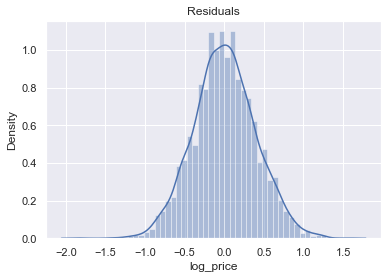

In [119]:
sns.distplot(y_test - y_hat_test)
plt.title("Residuals")

#### fact values vs. prediction plotted

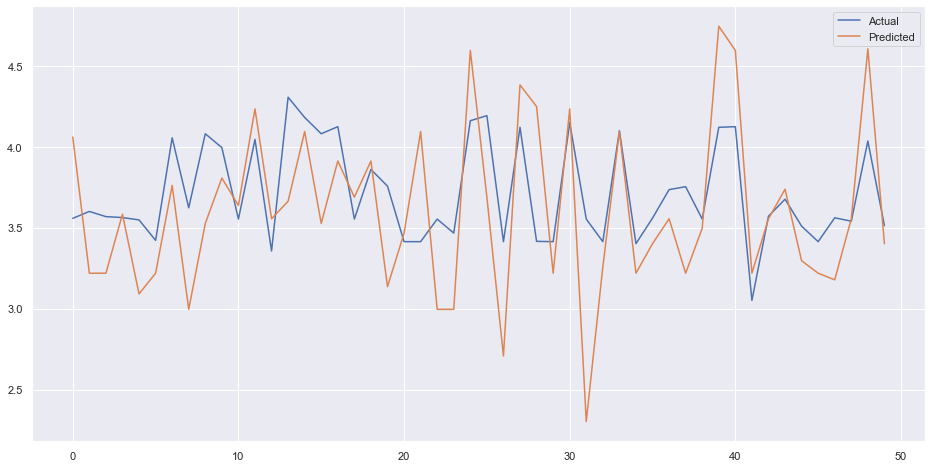

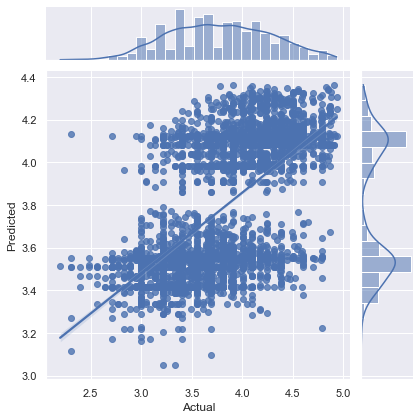

In [120]:
test = pd.DataFrame({'Predicted':reg.predict(x_test),'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',)

## 4.2 Random Forrest Regressor 

In [121]:
# starting point is the dataset data_feature_selection, 
# this dataset contains only the relevant features,
# an approximation to the normal distribution has not yet taken place.

In [122]:
random_forest_berlin_airbnb = data_feature_auswahl

In [123]:
random_forest_berlin_airbnb.head()

neighbourhood_group        room_type  price  \
0                 Mitte  Entire home/apt     60   
1                Pankow     Private room     17   
2                Pankow  Entire home/apt     90   
3  Tempelhof-Schöneberg     Private room     26   
4                Pankow     Private room     42   

   calculated_host_listings_count  availability_365  
0                               4               141  
1                               1                 0  
2                               1               220  
3                               1               297  
4                               1                26

In [124]:
random_forest_berlin_airbnb_with_dummies = pd.get_dummies(random_forest_berlin_airbnb)

### Feature-Skalierung

In [125]:
targets = random_forest_berlin_airbnb_with_dummies['price']
inputs = random_forest_berlin_airbnb_with_dummies.drop(['price'],axis= 1)

In [126]:
scaler = StandardScaler()
scaler.fit(inputs)
inputs_scaled = scaler.transform(inputs)

### Train Test Split (= prevents Overfitting) 

In [127]:
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets,test_size=0.2, random_state=365)

### Production of Regression

In [128]:
rfr = RandomForestRegressor(bootstrap=True, max_depth=None, max_features='auto',
                            min_samples_leaf=4, min_samples_split=2)
rfr.fit(x_train, y_train)
y_predictions=rfr.predict(x_test)

In [129]:
R_2 = rfr.score(x_train,y_train)
print('Train Performance')
print('R2:   ',R_2)

Train Performance
R2:    0.6994935521191867


#### Testing

In [130]:
## Coefficient of determination, which reflects the relationship between independent and dependent variable.
## R^2 lies in the range between 0 and 1.
## If the R^2 value is equal to 1, all points lie ideally on the regression line.

In [131]:
R_2 = rfr.score(x_test,y_test)
print('Test Performance')
print('R2:   ',R_2)

Test Performance
R2:    0.6186421639510178


In [132]:

feature_list = list(inputs.columns)

importances = list(rfr.feature_importances_)
feature_importances = [(feature, round(importance,2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1])
df = pd.DataFrame(feature_importances,columns=['Features','Weights'])
print (df)

mean_importance_room_type = round(df[df['Features'].str.contains('room_type')]['Weights'].mean(),5)
mean_importance_neighbourhood_group = round(df[df['Features'].str.contains('neighbourhood_group')]['Weights'].mean(),5)
mean_importance_availability_365 = round(df[df['Features'].str.contains('availability_365')]['Weights'].mean(),5)
mean_importance_calculated_host_listings_count = round(df[df['Features'].str.contains('calculated_host_listings_count')]['Weights'].mean(),5)


print('\nDurchschnitt Weights:')
print('{:20} Weight of neighbourhood_group'.format(mean_importance_neighbourhood_group))
print('{:20} Weight of room_type'.format(mean_importance_room_type))
print('{:20} Weight of calculated_host_listings_count'.format(mean_importance_calculated_host_listings_count))
print('{:20} Weight of availability_365'.format(mean_importance_availability_365))




                                          Features  Weights
0     neighbourhood_group_Friedrichshain-Kreuzberg     0.00
1                  neighbourhood_group_Lichtenberg     0.00
2          neighbourhood_group_Marzahn-Hellersdorf     0.00
3                        neighbourhood_group_Mitte     0.00
4                     neighbourhood_group_Neukölln     0.00
5                       neighbourhood_group_Pankow     0.00
6                neighbourhood_group_Reinickendorf     0.00
7                      neighbourhood_group_Spandau     0.00
8          neighbourhood_group_Steglitz-Zehlendorf     0.00
9             neighbourhood_group_Treptow-Köpenick     0.00
10                           room_type_Shared room     0.00
11  neighbourhood_group_Charlottenburg-Wilmersdorf     0.01
12        neighbourhood_group_Tempelhof-Schöneberg     0.02
13                                availability_365     0.10
14                       room_type_Entire home/apt     0.20
15                          room_type_Pr

#### Mean Absolute Error

In [133]:
## Average absolute deviation of the predicted value from the value that occurred.
## Undirected accumulation of over- and underestimations.
## MAE = 0 can be interpreted as a perfect forecast.

In [134]:
print("MAE: ", mean_absolute_error(y_test, y_predictions))

MAE:  28.16271419814525


#### Mean Squared Error

In [135]:
## The squared ME
## Large deviations receive a disproportionate weight compared to small deviations.
## MSE = 0 can be interpreted as a perfect forecast.

In [136]:
print("MAE: ", mean_squared_error(y_test, y_predictions))

MAE:  9828.498150732032


#### Predictions, Targets, Residuals, Difference% 

In [137]:
df_rf = pd.DataFrame(np.exp(y_predictions), columns=['Predictions'])
df_rf.head()

C:\Users\du-wa\AppData\Local\Temp/ipykernel_26192/2419183680.py:1: RuntimeWarning: overflow encountered in exp
  df_rf = pd.DataFrame(np.exp(y_predictions), columns=['Predictions'])


Predictions
0  3.004024e+16
1  2.534324e+26
2  2.171677e+18
3  6.141742e+14
4  2.340858e+13

In [138]:
y_test = y_test.reset_index(drop=True)
df_rf['Targets']=np.exp(y_test)
df_rf

c:\Git_Repos\ml-services\venv\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


Predictions       Targets
0     3.004024e+16  1.171914e+16
1     2.534324e+26  1.142007e+26
2     2.171677e+18  5.184706e+21
3     6.141742e+14  1.586013e+15
4     2.340858e+13  2.202647e+04
...            ...           ...
4504  4.450291e+27  4.851652e+08
4505  1.854274e+17  3.584913e+09
4506  1.778611e+40  1.142007e+26
4507  7.299648e+33  4.727839e+18
4508  1.716382e+16  2.146436e+14

[4509 rows x 2 columns]

In [139]:
df_rf['Residuals'] = df_rf['Targets'] - df_rf['Predictions']
df_rf

Predictions       Targets     Residuals
0     3.004024e+16  1.171914e+16 -1.832110e+16
1     2.534324e+26  1.142007e+26 -1.392316e+26
2     2.171677e+18  5.184706e+21  5.182534e+21
3     6.141742e+14  1.586013e+15  9.718393e+14
4     2.340858e+13  2.202647e+04 -2.340858e+13
...            ...           ...           ...
4504  4.450291e+27  4.851652e+08 -4.450291e+27
4505  1.854274e+17  3.584913e+09 -1.854274e+17
4506  1.778611e+40  1.142007e+26 -1.778611e+40
4507  7.299648e+33  4.727839e+18 -7.299648e+33
4508  1.716382e+16  2.146436e+14 -1.694918e+16

[4509 rows x 3 columns]

In [140]:
df_rf['Difference%'] = np.absolute(df_rf['Residuals'] / df_rf['Targets']*100)
df_rf

Predictions       Targets     Residuals   Difference%
0     3.004024e+16  1.171914e+16 -1.832110e+16  1.563348e+02
1     2.534324e+26  1.142007e+26 -1.392316e+26  1.219183e+02
2     2.171677e+18  5.184706e+21  5.182534e+21  9.995811e+01
3     6.141742e+14  1.586013e+15  9.718393e+14  6.127560e+01
4     2.340858e+13  2.202647e+04 -2.340858e+13  1.062748e+11
...            ...           ...           ...           ...
4504  4.450291e+27  4.851652e+08 -4.450291e+27  9.172733e+20
4505  1.854274e+17  3.584913e+09 -1.854274e+17  5.172439e+09
4506  1.778611e+40  1.142007e+26 -1.778611e+40  1.557442e+16
4507  7.299648e+33  4.727839e+18 -7.299648e+33  1.543971e+17
4508  1.716382e+16  2.146436e+14 -1.694918e+16  7.896430e+03

[4509 rows x 4 columns]

In [141]:
df_rf.describe(include ='all')

Predictions       Targets      Residuals    Difference%
count  4.509000e+03  4.509000e+03   4.507000e+03   4.499000e+03
mean            inf           inf            inf  1.353409e+204
std             NaN           NaN            NaN            inf
min    1.385562e+05  8.103084e+03 -5.572802e+244   7.805810e-02
25%    1.716382e+16  1.068647e+13  -3.885309e+29   1.000000e+02
50%    2.875709e+24  2.581313e+20  -1.285259e+16   8.333046e+04
75%    7.866260e+30  2.515439e+30   7.694783e+23   9.616541e+09
max             inf           inf            inf  6.088054e+207

## 4.3 Neural network with Keras

In [142]:
neuronales_netz_berlin_airbnb = data_feature_auswahl

In [143]:
neuronales_netz_berlin_airbnb_with_dummies = pd.get_dummies(neuronales_netz_berlin_airbnb)

In [144]:
targets = neuronales_netz_berlin_airbnb_with_dummies['price']
inputs = neuronales_netz_berlin_airbnb_with_dummies.drop(['price'],axis= 1)

### Feature Scaling

In [145]:
scaler = StandardScaler()
scaler.fit(inputs)
inputs_scaled = scaler.transform(inputs)

### Train Test Split (= prevents Overfitting)

In [146]:
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets,test_size=0.2, random_state=365)

### production of models

In [148]:
# Defining the keras model: the sequential model is used
model = keras.Sequential([keras.layers.Dense(512, input_dim = x_train.shape[1], kernel_initializer="normal", activation="relu"),
                          keras.layers.Dense(512, kernel_initializer="normal", activation="relu", kernel_regularizer=keras.regularizers.l1(0.1)),
                          keras.layers.Dense(256, kernel_initializer="normal", activation="relu", kernel_regularizer=keras.regularizers.l1(0.1)),
                          keras.layers.Dense(128, kernel_initializer="normal", activation="relu", kernel_regularizer=keras.regularizers.l1(0.1)),
                          keras.layers.Dense(64, kernel_initializer="normal", activation="relu", kernel_regularizer=keras.regularizers.l1(0.1)),
                          keras.layers.Dense(32, kernel_initializer="normal", activation="relu", kernel_regularizer=keras.regularizers.l1(0.1)),
                          keras.layers.Dense(1, kernel_initializer="normal", activation="linear")])



In [149]:
#model.compile(optimizer='adam',  loss='mean_squared_error')
model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae', 'mape'])

In [150]:
history = model.fit(x_train, y_train, epochs=100, validation_split=0.25, shuffle=True)

Epoch 1/100
423/423 [==============================] - 3s 6ms/step - loss: 52293.3281 - mse: 51679.7109 - mae: 41.9098 - mape: 66.6437 - val_loss: 60160.3984 - val_mse: 59678.9336 - val_mae: 37.0176 - val_mape: 48.9715
Epoch 2/100
423/423 [==============================] - 3s 7ms/step - loss: 50323.0234 - mse: 49811.2852 - mae: 40.1004 - mape: 64.6385 - val_loss: 50109.9961 - val_mse: 49417.6133 - val_mae: 41.6000 - val_mape: 63.4633
Epoch 3/100
423/423 [==============================] - 2s 6ms/step - loss: 47327.1953 - mse: 46472.9922 - mae: 40.1668 - mape: 63.5447 - val_loss: 35793.2812 - val_mse: 34904.3281 - val_mae: 47.5639 - val_mape: 91.9253
Epoch 4/100
423/423 [==============================] - 2s 6ms/step - loss: 37613.8594 - mse: 36620.3633 - mae: 38.1361 - mape: 61.4937 - val_loss: 65582.8203 - val_mse: 64661.3555 - val_mae: 56.5424 - val_mape: 71.7409
Epoch 5/100
423/423 [==============================] - 2s 6ms/step - loss: 51873.2305 - mse: 50971.9766 - mae: 36.8921 - map

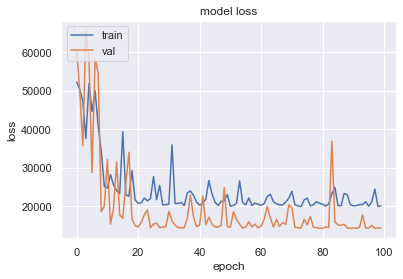

In [151]:
# Consider validation accuracy to avoid overfitting as well as underfitting.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()